**STEP 1: IMPORTING TRAIN DATASET AND LIBRARIES**

In [ ]:
#importing the train file
from google.colab import files
uploaded=files.upload()

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_curve, auc
from numpy.lib.function_base import disp
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

**STEP 2: PRE-PROCESSING**

2.1 Dataframe

In [ ]:
df=pd.read_csv('Fraud_Detection_Dataset.csv')
#data into dataframe named df

In [ ]:
df
#How the dataframe looks like

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X192,X193,X194,X195,X196,X197,X198,X199,X200,Response
0,6.5983,-5.4256,-1.6443,13.8045,3.7169,6.7931,14.6561,11.5962,-10.0106,18.7749,...,12.0647,2.1140,11.1032,1.3060,7.7833,-19.1025,13.0473,1.2374,4.9343,1
1,7.5116,-4.3535,-4.0704,14.2800,1.8892,11.8115,14.6331,7.5008,8.7162,10.7818,...,-1.5024,2.8147,18.2737,-3.1967,6.8112,-9.1633,11.0487,1.0700,0.0028,1
2,6.1407,1.3776,-6.5337,13.9074,2.5997,12.1947,14.8693,11.8861,-9.2483,23.8771,...,-6.9850,14.2934,8.2079,-1.7949,5.8634,-32.5582,23.4720,0.3236,8.3363,0
3,6.7580,-4.7164,-0.4525,14.2519,13.4656,5.5629,14.6345,9.9810,-12.0141,17.8304,...,-2.9186,13.1990,3.6219,-9.7055,16.9012,-26.6770,24.9518,-0.2713,1.4283,0
4,6.1647,0.4752,-6.8146,13.7472,11.7696,8.7009,15.0317,9.4731,2.1471,17.5970,...,12.0055,5.0098,2.3963,-14.0838,6.8654,-11.6183,18.4232,0.7031,4.9355,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159994,8.9290,3.1092,-9.2438,13.9538,2.9364,9.5257,14.2322,9.5203,-6.6305,18.8167,...,-4.0528,16.3990,0.2099,-9.1813,12.4886,-20.3469,15.5428,-0.6679,5.1581,0
159995,8.1184,-6.0853,3.0527,13.9423,10.8704,9.8084,14.2840,7.5810,-0.1328,24.1422,...,6.9672,11.8932,6.7121,-0.4154,7.2749,-6.6648,14.2498,0.0686,0.1912,0
159996,7.8342,-3.8483,9.4197,13.9596,4.1438,6.6866,14.6000,8.9788,-5.3439,11.4720,...,4.7888,13.0737,9.1364,2.7753,10.0250,-4.4415,15.4195,-0.8760,3.8739,0
159997,6.9303,-2.8427,-2.7800,14.0306,4.8316,5.3820,13.9774,5.3235,-2.4102,-0.4709,...,-12.3136,11.0787,14.3774,-7.0239,7.4206,0.4610,13.9774,0.1776,2.2107,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159999 entries, 0 to 159998
Columns: 201 entries, X1 to Response
dtypes: float64(200), int64(1)
memory usage: 245.4 MB


2.2 NA/Nan value check

In [ ]:
#Check for missing values
print(df.isnull().values.sum()==0)

True


In [ ]:
df.isnull().sum().sum()

0

2.3 Train data analysis

In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X192,X193,X194,X195,X196,X197,X198,X199,X200,Response
count,159999.000000,159999.000000,159999.000000,159999.000000,159999.000000,159999.000000,159999.000000,159999.000000,159999.000000,159999.000000,...,159999.000000,159999.000000,159999.000000,159999.000000,159999.000000,159999.000000,159999.000000,159999.000000,159999.000000,159999.000000
mean,7.565888,0.390284,-3.242711,14.023562,8.522378,7.541808,14.573214,9.334104,-5.701538,15.254998,...,0.715525,8.777661,12.770941,-3.988411,8.963027,-10.322778,15.371406,0.747224,3.244901,0.112751
std,1.234900,5.502574,5.981830,0.190413,4.648674,2.249323,0.412462,2.559733,6.714893,7.860526,...,8.956000,4.473978,9.325642,4.722985,3.188795,11.568420,3.947831,0.976308,4.564963,0.316289
min,3.970500,-20.731300,-26.095000,13.434600,-6.011100,1.013300,13.076900,0.635100,-33.380200,-10.664200,...,-26.001100,-4.808200,-18.489700,-22.583300,-3.022300,-47.753600,4.412300,-2.554300,-14.093300,0.000000
25%,6.618900,-3.595000,-7.517500,13.893400,5.058600,5.785300,14.262000,7.452600,-10.479850,9.178350,...,-6.075500,5.432400,5.672500,-7.364750,6.710100,-19.177000,12.493550,0.017700,-0.054750,0.000000
50%,7.628300,0.484700,-3.297700,14.025000,8.592700,7.522600,14.574200,9.231400,-5.675900,15.209800,...,0.709500,8.608700,12.528200,-3.951400,8.896200,-10.200400,15.232800,0.743400,3.210500,0.000000
75%,8.582500,4.375350,0.867050,14.164400,12.271700,9.275100,14.875500,11.059250,-0.815250,21.026400,...,7.491250,12.131150,19.481250,-0.599950,11.186800,-1.469600,18.343450,1.483600,6.419300,0.000000
max,11.150600,18.670200,17.188700,14.654500,22.331500,14.937700,15.863300,17.550100,19.025900,41.748000,...,29.248700,23.704900,44.363400,12.997500,21.739200,22.786100,29.330300,4.034100,18.440900,1.000000


2.4 Division of predictor and response variables

In [ ]:
df_x=df.drop('Response',axis=1)
df_y=df['Response']
#response is dependent and X1 to X200 independent variables

2.5 More analysis and operations

In [ ]:
plt.rcParams['figure.figsize'] = [18, 12]
#increasing the size of graphs of the entire project

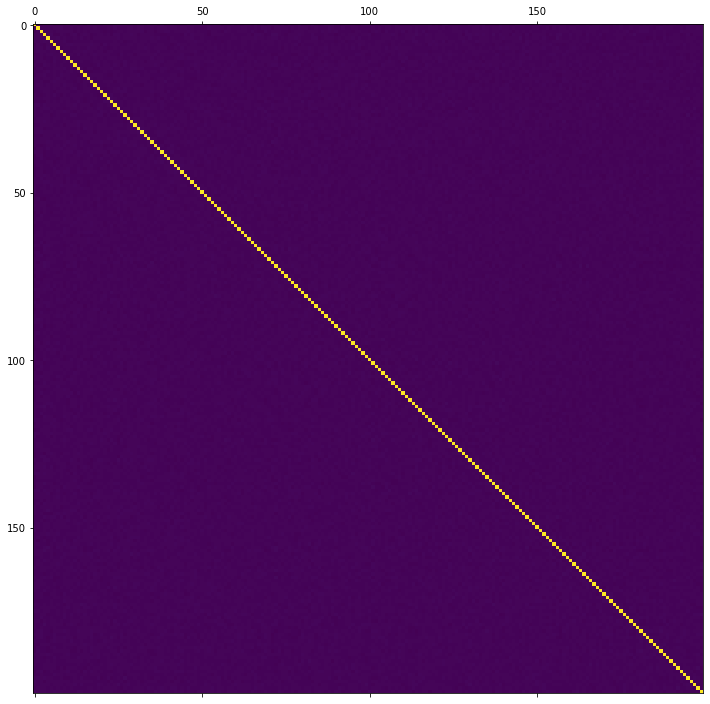

In [ ]:
plt.matshow(df_x.corr())
#less correlation- Dimension reduction to utilise? No

In [ ]:
df.iloc[:,0:49].skew()
#skewness check in 4 different parts for predictor variables- not much skewed, good to go

X1    -0.175626
X2    -0.057109
X3     0.074412
X4    -0.143802
X5    -0.176205
X6     0.038102
X7     0.035166
X8     0.192708
X9    -0.052632
X10    0.091840
X11    0.051297
X12    0.057569
X13    0.001482
X14    0.156293
X15    0.063247
X16    0.143138
X17    0.177237
X18    0.174984
X19    0.020652
X20   -0.040696
X21    0.199455
X22   -0.114057
X23    0.073916
X24    0.003396
X25    0.089025
X26   -0.029534
X27   -0.021637
X28   -0.046665
X29    0.046464
X30    0.113479
X31   -0.057357
X32    0.046195
X33    0.142411
X34   -0.140034
X35   -0.020222
X36   -0.340341
X37   -0.000892
X38    0.081356
X39   -0.007720
X40    0.026450
X41    0.059047
X42   -0.047833
X43    0.063808
X44   -0.013872
X45    0.075104
X46   -0.026313
X47    0.128177
X48   -0.126876
X49    0.068756
dtype: float64

In [ ]:
df.iloc[:,50:99].skew()

X51    0.045731
X52    0.194046
X53    0.062357
X54    0.193703
X55   -0.118702
X56   -0.082032
X57   -0.073940
X58    0.063233
X59    0.012253
X60   -0.156132
X61    0.098754
X62   -0.006719
X63    0.024469
X64    0.001012
X65    0.061850
X66   -0.045026
X67   -0.070367
X68   -0.149464
X69    0.095446
X70   -0.063606
X71    0.090294
X72   -0.222529
X73   -0.235204
X74   -0.045854
X75   -0.082829
X76   -0.015343
X77    0.037950
X78   -0.219422
X79    0.048588
X80    0.003297
X81    0.149244
X82   -0.011646
X83    0.078127
X84    0.025919
X85   -0.238255
X86    0.071936
X87    0.140917
X88    0.055299
X89    0.015779
X90   -0.105151
X91    0.128250
X92   -0.091899
X93   -0.018048
X94   -0.048766
X95    0.057511
X96    0.047831
X97    0.125095
X98    0.021407
X99    0.091062
dtype: float64

In [ ]:
df.iloc[:,100:149].skew()

X101    0.036068
X102    0.129651
X103    0.035302
X104   -0.167970
X105   -0.075202
X106   -0.097099
X107   -0.082682
X108   -0.082746
X109    0.020869
X110   -0.047354
X111    0.082591
X112    0.084689
X113    0.091343
X114   -0.050017
X115   -0.184941
X116   -0.052394
X117    0.161852
X118    0.049897
X119   -0.078863
X120   -0.029050
X121   -0.006855
X122    0.043924
X123   -0.139793
X124   -0.068175
X125    0.121403
X126    0.014708
X127    0.061111
X128    0.004663
X129    0.106173
X130    0.003380
X131   -0.117314
X132   -0.119832
X133   -0.086476
X134    0.064108
X135   -0.102157
X136    0.006384
X137    0.031989
X138   -0.124940
X139    0.007125
X140   -0.067004
X141   -0.015582
X142    0.085031
X143    0.087257
X144   -0.129541
X145    0.043934
X146   -0.068167
X147    0.086259
X148    0.093955
X149    0.156573
dtype: float64

In [ ]:
df.iloc[:,150:199].skew()

X151    0.054179
X152    0.108098
X153    0.024122
X154    0.058746
X155    0.239723
X156   -0.074763
X157   -0.018991
X158   -0.064464
X159   -0.052232
X160    0.270800
X161   -0.016139
X162    0.107143
X163    0.014869
X164    0.031158
X165   -0.058631
X166   -0.114739
X167    0.138012
X168   -0.073805
X169    0.121173
X170   -0.004524
X171    0.241635
X172    0.064128
X173    0.208160
X174    0.087058
X175   -0.109142
X176    0.000341
X177    0.123656
X178   -0.030891
X179   -0.032387
X180   -0.173440
X181   -0.165205
X182    0.236390
X183    0.052969
X184    0.257420
X185   -0.003194
X186   -0.050752
X187   -0.002329
X188    0.147150
X189    0.083382
X190   -0.103716
X191    0.206826
X192   -0.000486
X193    0.076558
X194    0.144336
X195   -0.037060
X196    0.104513
X197   -0.020051
X198    0.033437
X199   -0.008101
dtype: float64

In [ ]:
df.iloc[:,200].skew()
#response variable is skewed positive- as number of 0s exceeds 1s by a large margin

2.448737541107384

(array([141959.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  18040.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

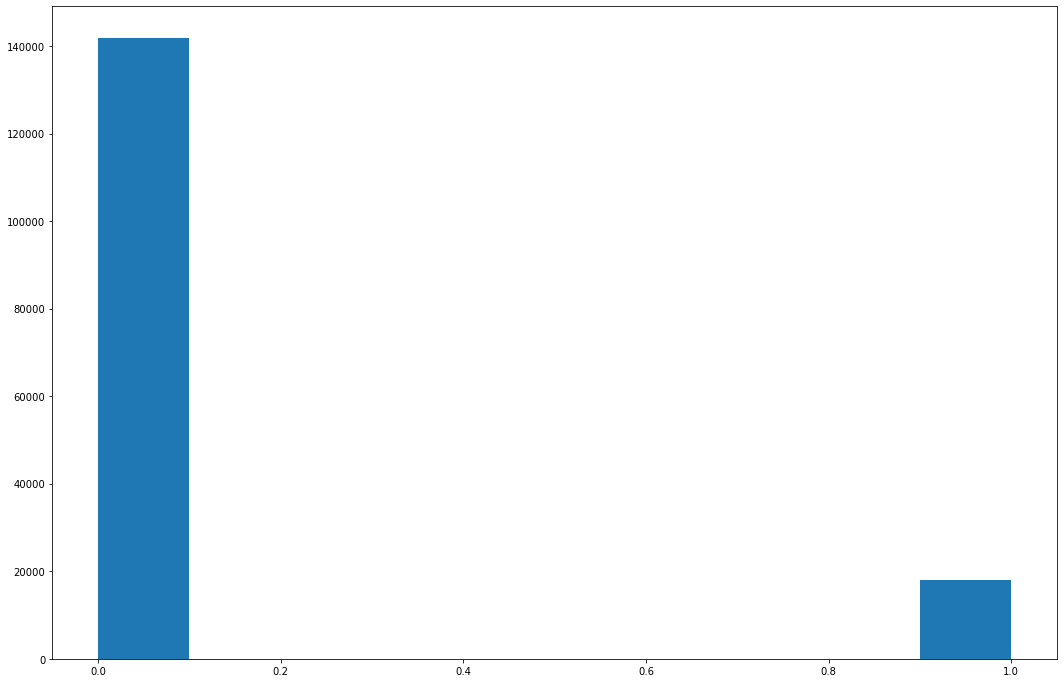

In [ ]:
plt.hist(df_y)
#Proof of skewness with a histogram graph

2.6 Scaling

In [ ]:
scaler=StandardScaler()
df_x_scaled=scaler.fit_transform(df_x)
print(df_x_scaled)
#StandardScaler scales variables into unit variance, median tends to 0

[[-0.78353796 -1.05694209  0.26721193 ... -0.5887064   0.50207246
   0.37008055]
 [-0.04396143 -0.86210539 -0.13836753 ... -1.09496068  0.33060966
  -0.71021636]
 [-1.15409552  0.1794286  -0.55016585 ...  2.05191654 -0.43390548
   1.11532441]
 ...
 [ 0.21727517 -0.77029353  2.11681878 ...  0.01218242 -1.6626198
   0.13778878]
 [-0.51468938 -0.58754212  0.07735306 ... -0.35310793 -0.58344891
  -0.22655266]
 [ 1.67723633 -1.49148553  1.71138978 ... -0.20571007  1.08488211
   0.86675645]]


In [ ]:
df_x_scaled=pd.DataFrame(df_x_scaled)
#conversion to dataframe for a good look

In [ ]:
df_x_scaled
#How our scaled independent variable data looks like

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.783538,-1.056942,0.267212,-1.150459,-1.033734,-0.332860,0.200954,0.883726,-0.641719,0.447796,...,-1.563666,1.267219,-1.489431,-0.178834,1.120992,-0.369961,-0.758941,-0.588706,0.502072,0.370081
1,-0.043961,-0.862105,-0.138368,1.346747,-1.426901,1.898218,0.145192,-0.716211,2.147135,-0.569073,...,2.200009,-0.247648,-1.332814,0.590069,0.167630,-0.674811,0.100228,-1.094961,0.330610,-0.710216
2,-1.154096,0.179429,-0.550166,-0.610054,-1.274062,2.068581,0.717852,0.996980,-0.528195,1.096890,...,1.597020,-0.859820,1.232853,-0.489302,0.464435,-0.972040,-1.922085,2.051917,-0.433905,1.115324
3,-0.654215,-0.928057,0.466449,1.199173,1.063365,-0.879782,0.148586,0.252721,-0.940087,0.327638,...,-0.721535,-0.405777,0.988238,-0.981066,-1.210486,2.489404,-1.413700,2.426756,-1.043244,-0.397946
4,-1.134661,0.015432,-0.597125,-1.451385,0.698529,0.515309,1.111587,0.054301,1.168844,0.297946,...,1.936406,1.260609,-0.842175,-1.112489,-2.137508,-0.657814,-0.111988,0.773033,-0.045195,0.370343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159994,1.103828,0.494119,-1.003223,-0.366373,-1.201632,0.881998,-0.826780,0.072740,-0.138344,0.453114,...,-0.598505,-0.532418,1.703487,-1.346940,-1.099496,1.105616,-0.866510,0.043415,-1.449469,0.419106
159995,0.447416,-1.176832,1.052426,-0.426768,0.505097,1.007681,-0.701193,-0.684880,0.829314,1.130615,...,0.398323,0.698045,0.696371,-0.649699,0.756518,-0.529395,0.316205,-0.284108,-0.695094,-0.668945
159996,0.217275,-0.770294,2.116819,-0.335913,-0.941901,-0.380208,0.064941,-0.138806,0.053261,-0.481267,...,0.865615,0.454811,0.960231,-0.389737,1.432088,0.333034,0.508392,0.012182,-1.662620,0.137789
159997,-0.514689,-0.587542,0.077353,0.036961,-0.793945,-0.960207,-1.444537,-1.566811,0.490156,-2.000623,...,0.661634,-1.454797,0.514318,0.172263,-0.642708,-0.483704,0.932177,-0.353108,-0.583449,-0.226553


In [ ]:
df_x_scaled.describe()
#analysis of scaled data

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,1.599990e+05,1.599990e+05,1.599990e+05,1.599990e+05,1.599990e+05,1.599990e+05,1.599990e+05,1.599990e+05,1.599990e+05,1.599990e+05,...,1.599990e+05,1.599990e+05,1.599990e+05,1.599990e+05,1.599990e+05,1.599990e+05,1.599990e+05,1.599990e+05,1.599990e+05,1.599990e+05
mean,6.694492e-16,1.065266e-17,-4.031523e-18,-1.893855e-14,-1.824149e-16,-5.326845e-16,-2.473073e-15,2.075436e-17,1.666913e-16,-2.075686e-16,...,1.893775e-17,-3.781721e-18,3.582882e-16,-1.642308e-16,6.834506e-17,3.570375e-16,-4.730690e-17,2.532025e-16,-2.297205e-17,-8.349623e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-2.911491e+00,-3.838504e+00,-3.820296e+00,-3.093081e+00,-3.126381e+00,-2.902442e+00,-3.627776e+00,-3.398413e+00,-4.121994e+00,-3.297398e+00,...,-3.319417e+00,-2.983107e+00,-3.036649e+00,-3.352127e+00,-3.937117e+00,-3.758587e+00,-3.235614e+00,-2.775990e+00,-3.381652e+00,-3.798115e+00
25%,-7.668564e-01,-7.242604e-01,-7.146311e-01,-6.835788e-01,-7.451133e-01,-7.809075e-01,-7.545310e-01,-7.350415e-01,-7.116013e-01,-7.730612e-01,...,-7.299063e-01,-7.582677e-01,-7.477174e-01,-7.611769e-01,-7.148762e-01,-7.065157e-01,-7.653811e-01,-7.289737e-01,-7.472297e-01,-7.228233e-01
50%,5.054047e-02,1.715858e-02,-9.192624e-03,7.551380e-03,1.512739e-02,-8.539338e-03,2.389965e-03,-4.012318e-02,3.818131e-03,-5.750051e-03,...,-3.621078e-02,-6.726840e-04,-3.776533e-02,-2.602950e-02,7.836375e-03,-2.095683e-02,1.057863e-02,-3.510952e-02,-3.916927e-03,-7.535961e-03
75%,8.232372e-01,7.242208e-01,6.870429e-01,7.396452e-01,8.065384e-01,7.705865e-01,7.328842e-01,6.739574e-01,7.276815e-01,7.342282e-01,...,6.750291e-01,7.565594e-01,7.495566e-01,7.195569e-01,7.174427e-01,6.973732e-01,7.652908e-01,7.528320e-01,7.542477e-01,6.953854e-01
max,2.902846e+00,3.322077e+00,3.415589e+00,3.313528e+00,2.970560e+00,3.288063e+00,3.127780e+00,3.209718e+00,3.682488e+00,3.370396e+00,...,3.111081e+00,3.185938e+00,3.336468e+00,3.387709e+00,3.596446e+00,4.006596e+00,2.862014e+00,3.535850e+00,3.366648e+00,3.328843e+00


2.7 Data cleaning with outlier removal

(array([ 1133.,  5322., 16144., 26013., 28491., 30203., 30618., 19037.,
         2961.,    77.]),
 array([-2.91149067, -2.33005702, -1.74862338, -1.16718974, -0.5857561 ,
        -0.00432246,  0.57711118,  1.15854482,  1.73997846,  2.3214121 ,
         2.90284574]),
 <BarContainer object of 10 artists>)

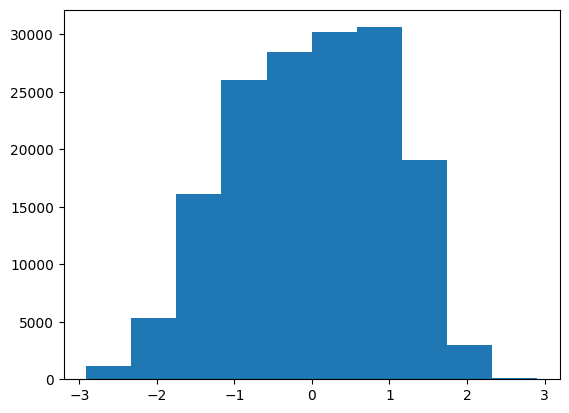

In [ ]:
plt.hist(df_x_scaled.iloc[:,[0]])
#limits of X1 under histogram

<AxesSubplot:>

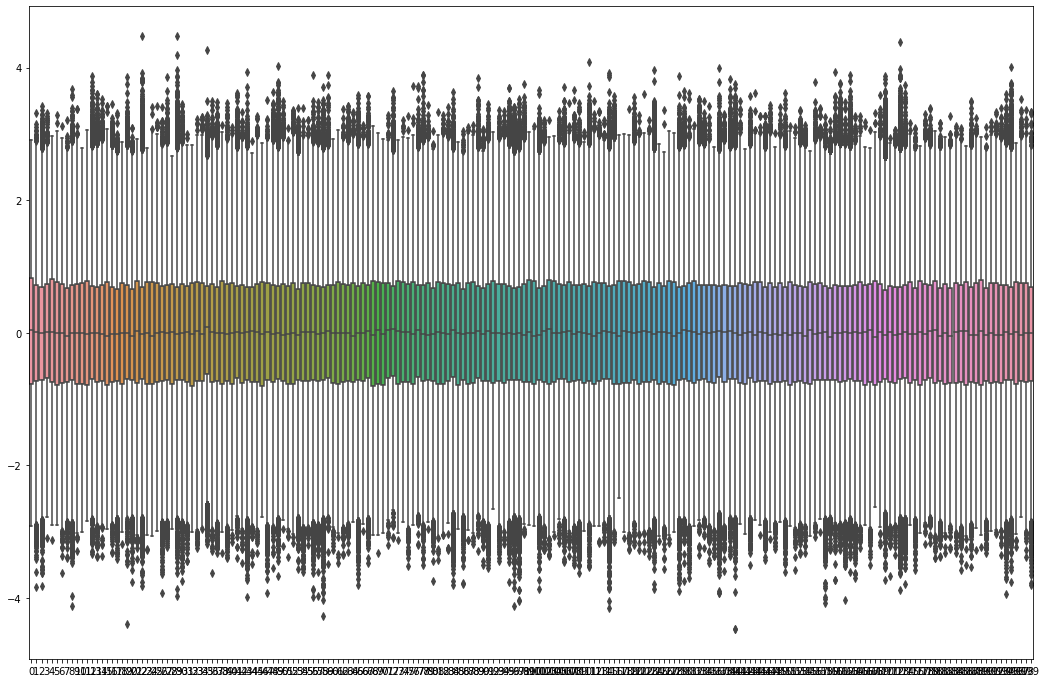

In [ ]:
sns.boxplot(data=df_x_scaled)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f32cdf020d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f32cdf02610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f32cdf62df0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f32cdf02b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f32cdf02df0>,
 'means': []}

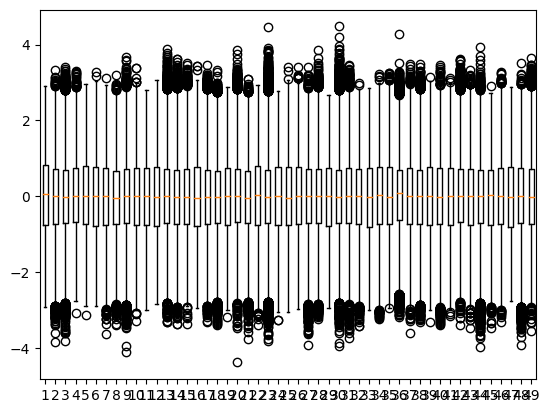

In [ ]:
plt.boxplot(df_x_scaled.iloc[:,0:49])
#division of the previous boxplot into 4 parts for clearer observation, Set acceptable data band to -3.2 to 3.2?- Likely

{'whiskers': [<matplotlib.lines.Line2D at 0x7f32cda8f8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f32cda8fe20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f32cda8f640>,
 'medians': [<matplotlib.lines.Line2D at 0x7f32cdaab3a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f32cdaab640>,
 'means': []}

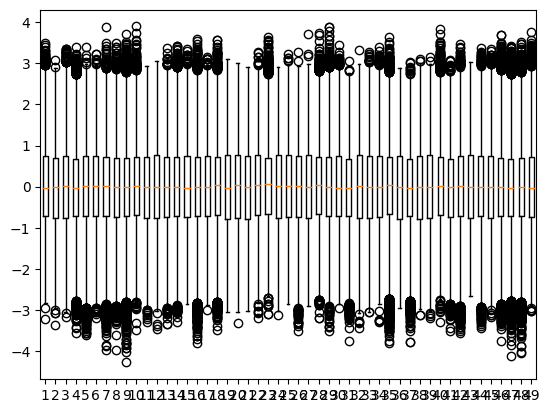

In [ ]:
plt.boxplot(df_x_scaled.iloc[:,50:99])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f32cd5bf760>,
 'caps': [<matplotlib.lines.Line2D at 0x7f32cd5bfb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f32cd5bf4c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f32cd5d6100>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f32cd5d63a0>,
 'means': []}

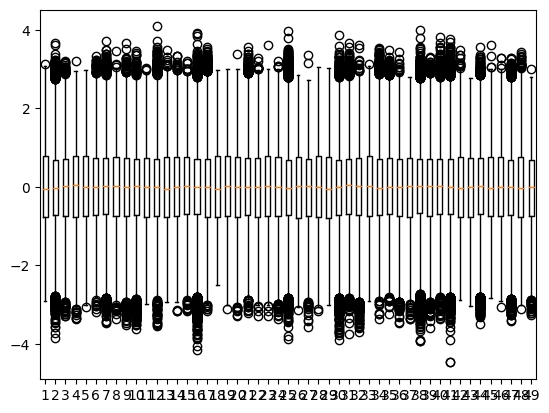

In [ ]:
plt.boxplot(df_x_scaled.iloc[:,100:149])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f32cd0fbaf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f32cd112070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f32cd0fb850>,
 'medians': [<matplotlib.lines.Line2D at 0x7f32cd1125b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f32cd112850>,
 'means': []}

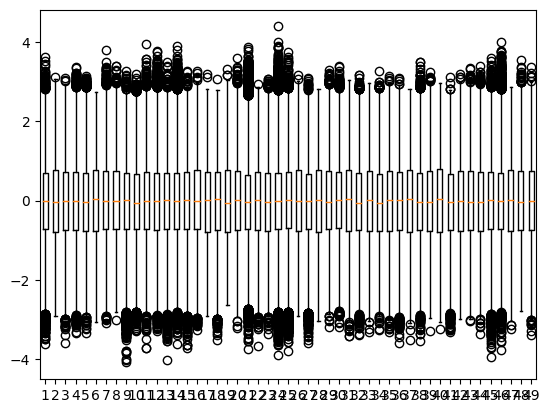

In [ ]:
plt.boxplot(df_x_scaled.iloc[:,150:199])

In [ ]:
df_x_new=df_x_scaled.mask((df_x_scaled<-3.7),0)
#removing outliers, with -3.2 to 3.2 as acceptable band, replacing outliers with the closest integer median 0

In [ ]:
df_x_new=df_x_new.mask((df_x_new>3.7),0)

{'whiskers': [<matplotlib.lines.Line2D at 0x1953f868730>,
 'caps': [<matplotlib.lines.Line2D at 0x1953f868d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1953f868460>,
 'medians': [<matplotlib.lines.Line2D at 0x1953f7ef2b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1953f7ef580>,
 'means': []}

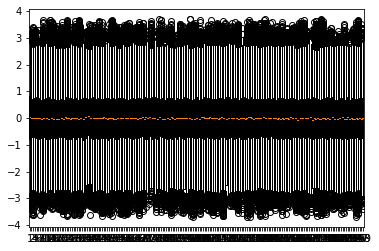

In [ ]:
plt.boxplot(df_x_new.iloc[:,0:199])
#lesser outliers visible from before

**STEP 3: MODEL TESTING**

3.1: Model 1: XG Boost Classifier

In [ ]:
#Scaled data without SMOTE sampling
X_train,X_test,y_train,y_test=train_test_split(df_x_new,df_y,test_size=0.20,random_state= 37)
model_XGB=XGBClassifier(learning_rate=0.1,n_estimators=800)
model_XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=800, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
predictions_XGB=model_XGB.predict(X_test)
accuracy = accuracy_score(y_test, predictions_XGB)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,predictions_XGB))

Accuracy: 0.91246875
[[28127   288]
 [ 2513  1072]]


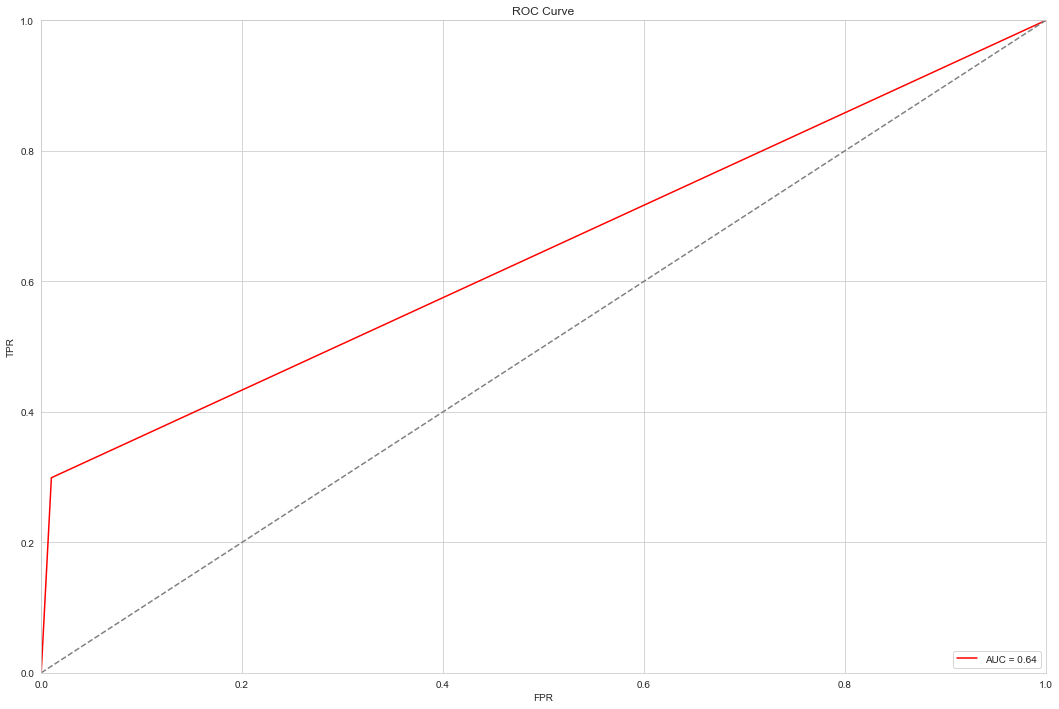

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,predictions_XGB)
roc_auc = auc(fpr, tpr)
sns.set_style("whitegrid")
sns.lineplot(x=fpr, y=tpr,color= 'red',label=f'AUC = {roc_auc:.2f}')
sns.lineplot(x=[0, 1], y=[0, 1], color= 'grey' , linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Threshold selection with 0.36
y_pred_prob = model_XGB.predict_proba(X_test)[:, 1]
threshold = 0.36
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.914125
[[27825   590]
 [ 2158  1427]]


In [ ]:
#Threshold selection with 0.37
y_pred_prob = model_XGB.predict_proba(X_test)[:, 1]
threshold = 0.37
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))
predictions_bestmodel_XGB=y_pred
#best accuracy attained

Accuracy: 0.9144375
[[27862   553]
 [ 2185  1400]]


In [ ]:
#Threshold selection with 0.38
y_pred_prob = model_XGB.predict_proba(X_test)[:, 1]
threshold = 0.38
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.91434375
[[27891   524]
 [ 2217  1368]]


In [ ]:
#Applying SMOTE to the previously imployed scaled data to compare the effect of SMOTE on the XGB classification prediction
X_train,X_test,y_train,y_test=train_test_split(df_x_new,df_y,test_size=0.20,random_state= 37)
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
model_XGB_smote=XGBClassifier(learning_rate=0.1,n_estimators=800)
model_XGB_smote.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=800, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
predictions_XGB_smote=model_XGB_smote.predict(X_test)
accuracy = accuracy_score(y_test, predictions_XGB_smote)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,predictions_XGB_smote))
#More noise with smote, as accuracy reduced to 87.37%
#Unscaled data without SMOTE gives the accuracy of about 88%, but not including due the high expense and low yield

Accuracy: 0.87378125
[[26887  1528]
 [ 2511  1074]]


3.2: Model 2: Random Forest Classifier

In [ ]:
#With scaled(Checking if RF model with or without scaled is better)
X_train,X_test,y_train,y_test=train_test_split(df_x_new,df_y,test_size=0.20,random_state= 37)
model_RF_n10=RandomForestClassifier(n_estimators=10,random_state=37)
model_RF_n10.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=37)

In [ ]:
predictions_model_RF_n10=model_RF_n10.predict(X_test)
accuracy = accuracy_score(y_test, predictions_model_RF_n10)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,predictions_model_RF_n10))
#Almost same accuracy as without the scaled

Accuracy: 0.888875
[[28371    44]
 [ 3512    73]]


In [ ]:
# Checking for threshold 0.10

y_pred_prob = model_RF_n10.predict_proba(X_test)[:, 1]
threshold = 0.10
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.41665625
[[10256 18159]
 [  508  3077]]


In [ ]:
#threshold 0.20

y_pred_prob = model_RF_n10.predict_proba(X_test)[:, 1]
threshold = 0.20
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.68259375
[[19607  8808]
 [ 1349  2236]]


In [ ]:
#threshold 0.30

y_pred_prob = model_RF_n10.predict_proba(X_test)[:, 1]
threshold = 0.30
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.8193125
[[24888  3527]
 [ 2255  1330]]


In [ ]:
#threshold 0.40

y_pred_prob = model_RF_n10.predict_proba(X_test)[:, 1]
threshold = 0.40
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.8740625
[[27292  1123]
 [ 2907   678]]


In [ ]:
#Without scaled data, better than scaled RF? No. How? Here's why:
X_train,X_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.20,random_state= 37)
model_RF_n10=RandomForestClassifier(n_estimators=10,random_state=37)
model_RF_n10.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=37)

In [ ]:
predictions_RF_n10=model_RF_n10.predict(X_test)
accuracy = accuracy_score(y_test, predictions_RF_n10)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,predictions_RF_n10))
#similar accuracy with scaled data, RF is good model for data with outliers, hence moving ahead with the unscaled data and processing further with increase in the tree sizes

Accuracy: 0.8885
[[28353    62]
 [ 3506    79]]


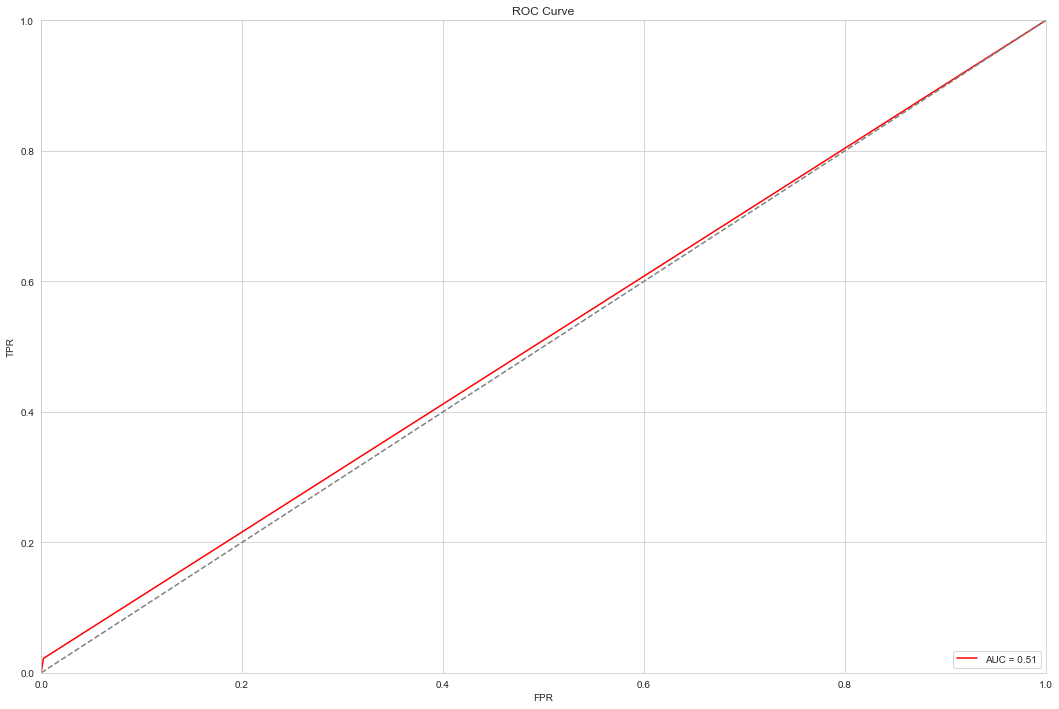

In [ ]:
#Roc for no scaled data for 10 trees
fpr, tpr, thresholds = roc_curve(y_test,predictions_RF_n10)
roc_auc = auc(fpr, tpr)
sns.set_style("whitegrid")
sns.lineplot(x=fpr, y=tpr,color= 'red',label=f'AUC = {roc_auc:.2f}')
sns.lineplot(x=[0, 1], y=[0, 1], color= 'grey' , linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#threshold 0.10
y_pred_prob = model_RF_n10.predict_proba(X_test)[:, 1]
threshold = 0.10
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.41634375
[[10239 18176]
 [  501  3084]]


In [ ]:
#threshold 0.20
y_pred_prob = model_RF_n10.predict_proba(X_test)[:, 1]
threshold = 0.20
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.683625
[[19618  8797]
 [ 1327  2258]]


In [ ]:
#threshold 0.25
y_pred_prob = model_RF_n10.predict_proba(X_test)[:, 1]
threshold = 0.25
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.82175
[[24947  3468]
 [ 2236  1349]]


In [ ]:
#threshold 0.35
y_pred_prob = model_RF_n10.predict_proba(X_test)[:, 1]
threshold = 0.35
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))
#still not anything near XGBoost, trying to see if SMOTE helps in further steps

Accuracy: 0.8715
[[27263  1152]
 [ 2960   625]]


In [ ]:
#Checking if SMOTE works for RF better than the previous unscaled data
X_train,X_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.20,random_state= 37)
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
model_RF_n10_smote=RandomForestClassifier(n_estimators=10,random_state=37)
model_RF_n10_smote.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=37)

In [ ]:
predictions_RF_n10_smote=model_RF_n10_smote.predict(X_test)
accuracy = accuracy_score(y_test, predictions_RF_n10_smote)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,predictions_RF_n10_smote))
#with SMOTE RF has more noise, hence not useful

Accuracy: 0.848125
[[26733  1682]
 [ 3178   407]]


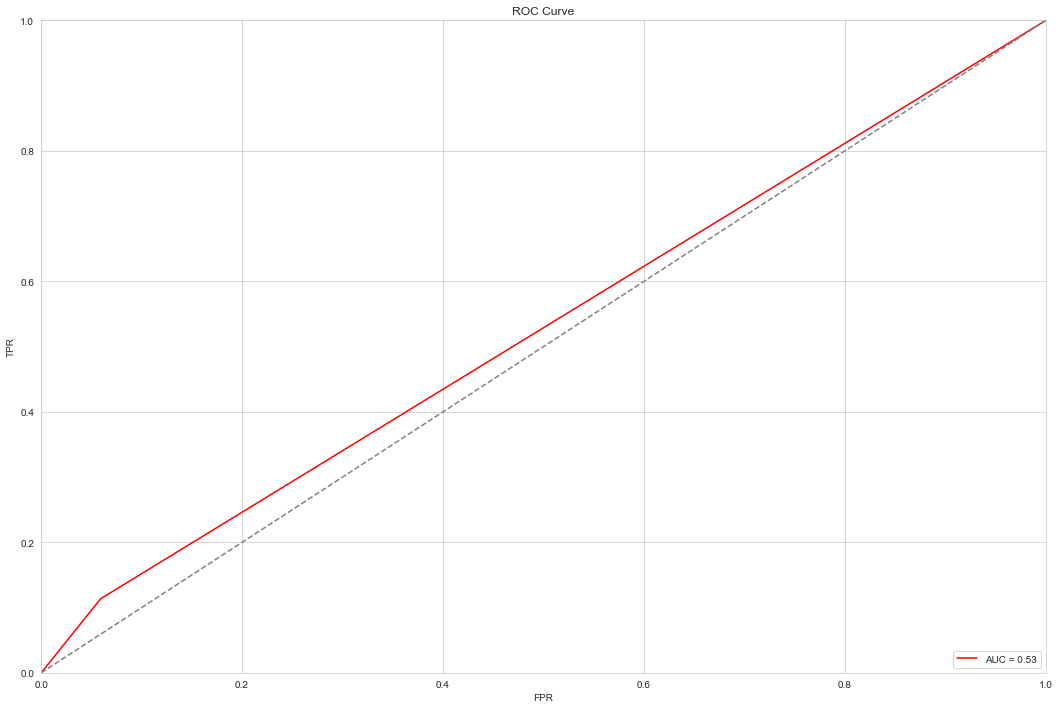

In [ ]:
#ROC curve for with smote data
fpr, tpr, thresholds = roc_curve(y_test,predictions_RF_n10_smote)
roc_auc = auc(fpr, tpr)
sns.set_style("whitegrid")
sns.lineplot(x=fpr, y=tpr,color= 'red',label=f'AUC = {roc_auc:.2f}')
sns.lineplot(x=[0, 1], y=[0, 1], color= 'grey' , linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Different threshold testing with smote on non scaled
y_pred_prob = model_RF_n10_smote.predict_proba(X_test)[:, 1]
threshold = 0.20
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.26271875
[[ 5185 23230]
 [  363  3222]]


In [ ]:
y_pred_prob = model_RF_n10_smote.predict_proba(X_test)[:, 1]
threshold = 0.35
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.6460625
[[18942  9473]
 [ 1853  1732]]


In [ ]:
y_pred_prob = model_RF_n10_smote.predict_proba(X_test)[:, 1]
threshold = 0.45
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.78096875
[[24047  4368]
 [ 2641   944]]


In [ ]:
#Checking the growth level in accuracy with SMOTE until 1000 tree number- VERY EXPENSIVE
X_train,X_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.20,random_state= 37)
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
model_RF_n1000_smote=RandomForestClassifier(n_estimators=1000,random_state=37)
model_RF_n1000_smote.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=37)

In [ ]:
predictions_RF_n1000_smote=model_RF_n1000_smote.predict(X_test)
accuracy = accuracy_score(y_test, predictions_RF_n1000_smote)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,predictions_RF_n1000_smote))
#unscaled without SMOTE on 1000 trees has just above 90% accuracy, much higher than here

Accuracy: 0.885
[[28244   171]
 [ 3509    76]]


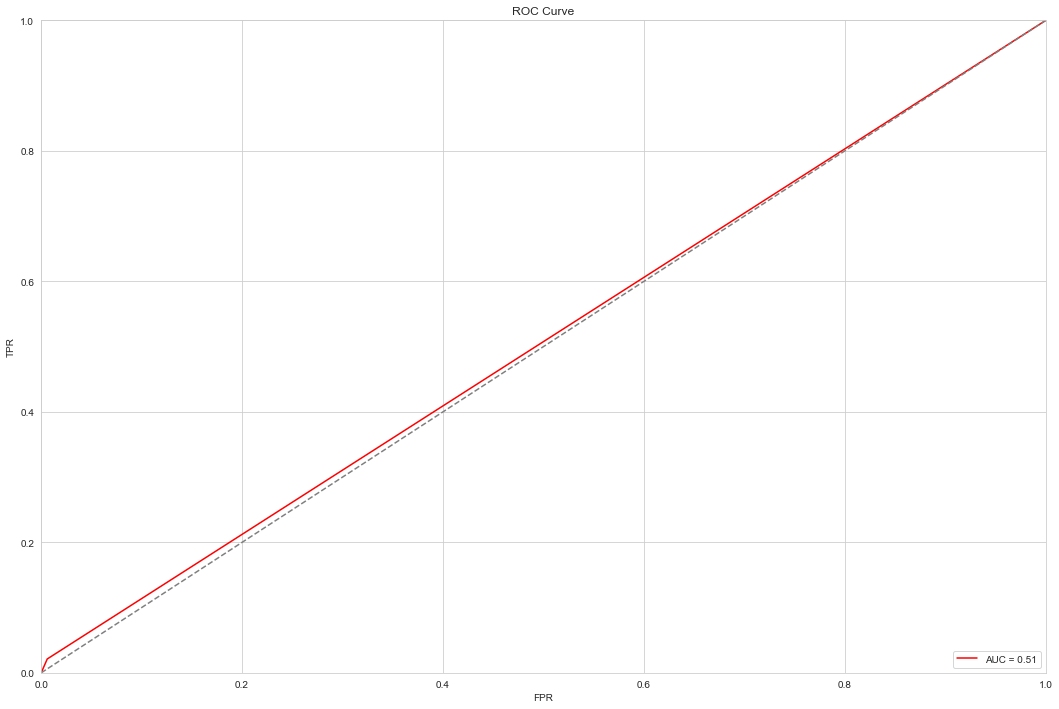

In [ ]:
#ROC curver with SMOTE, unscaled and 1000 trees
fpr, tpr, thresholds = roc_curve(y_test,predictions_RF_n1000_smote)
roc_auc = auc(fpr, tpr)
sns.set_style("whitegrid")
sns.lineplot(x=fpr, y=tpr,color= 'red',label=f'AUC = {roc_auc:.2f}')
sns.lineplot(x=[0, 1], y=[0, 1], color= 'grey' , linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Checking for different thresholds with the previous 1000 tree SMOTE model
y_pred_prob = model_RF_n1000_smote.predict_proba(X_test)[:, 1]
threshold = 0.3
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.61015625
[[16737 11678]
 [  797  2788]]


In [ ]:
y_pred_prob = model_RF_n1000_smote.predict_proba(X_test)[:, 1]
threshold = 0.35
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.785125
[[23455  4960]
 [ 1916  1669]]


Increasing trees to 50

In [ ]:
#50 tree RF for without scaled data
X_train,X_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.20,random_state= 37)
model_RF_n50=RandomForestClassifier(n_estimators=50,random_state=37)
model_RF_n50.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=37)

In [ ]:
predictions_RF_n50=model_RF_n50.predict(X_test)
accuracy = accuracy_score(y_test, predictions_RF_n50)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,predictions_RF_n50))

Accuracy: 0.8881875
[[28415     0]
 [ 3578     7]]


In [ ]:
#threshold 0.10

y_pred_prob = model_RF_n50.predict_proba(X_test)[:, 1]
threshold = 0.10
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.493875
[[12574 15841]
 [  355  3230]]


In [ ]:
#threshold 0.20
y_pred_prob = model_RF_n50.predict_proba(X_test)[:, 1]
threshold = 0.20
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.818375
[[24125  4290]
 [ 1522  2063]]


In [ ]:
#threshold 0.30
y_pred_prob = model_RF_n50.predict_proba(X_test)[:, 1]
threshold = 0.30
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.89259375
[[27797   618]
 [ 2819   766]]


In [ ]:
#threshold 0.40
y_pred_prob = model_RF_n50.predict_proba(X_test)[:, 1]
threshold = 0.40
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.8913125
[[28364    51]
 [ 3427   158]]


Increasing trees to 200

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.20,random_state= 37)
model_RF_n200=RandomForestClassifier(n_estimators=200,random_state=37)
model_RF_n200.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=37)

In [ ]:
predictions_RF_n200=model_RF_n200.predict(X_test)
accuracy = accuracy_score(y_test, predictions_RF_n200)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,predictions_RF_n200))

Accuracy: 0.88796875
[[28415     0]
 [ 3585     0]]


In [ ]:
#threshold 0.10

y_pred_prob = model_RF_n200.predict_proba(X_test)[:, 1]
threshold = 0.10
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))
#Increase in accuracy with trees 200, compared to trees 50 and same threshold

Accuracy: 0.51846875
[[13299 15116]
 [  293  3292]]


In [ ]:
#threshold 0.20

y_pred_prob = model_RF_n200.predict_proba(X_test)[:, 1]
threshold = 0.20
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.85853125
[[25434  2981]
 [ 1546  2039]]


In [ ]:
#threshold 0.25

y_pred_prob = model_RF_n200.predict_proba(X_test)[:, 1]
threshold = 0.25
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.89621875
[[27489   926]
 [ 2395  1190]]


In [ ]:
#threshold 0.30

y_pred_prob = model_RF_n200.predict_proba(X_test)[:, 1]
threshold = 0.30
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.89890625
[[28197   218]
 [ 3017   568]]


In [ ]:
#threshold 0.40

y_pred_prob = model_RF_n200.predict_proba(X_test)[:, 1]
threshold = 0.40
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))
#Accuracy still not beating XGBoost

Accuracy: 0.88953125
[[28412     3]
 [ 3532    53]]


3.3: Model 3: Support Vector Machines

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.20,random_state= 37)
#Splitting in the same proportions as always

In [ ]:
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)
#Calling the SMOTE function for up-sampling of the minority class

In [ ]:
model_svm = svm.SVC()
model_svm.fit(X_train,y_train)
y_pred_svm=model_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred_svm))
#83.93% accuracy with smote on unscaled data, let's see how it compares with the scaled data next

Accuracy: 0.83934375
[[25414  3001]
 [ 2140  1445]]


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df_x_new,df_y,test_size=0.20,random_state= 37)
#splitting with the scaled data

In [ ]:
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)
model_svm_smotescaler = svm.SVC()
model_svm_smotescaler.fit(X_train,y_train)
y_pred_svm=model_svm_smotescaler.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred_svm))
#Better accuracy, still not good enough for challenging results of XG Boost
#90.4% accuracy with scaled data and no SMOTE, but extremely expensive and not good enough to challenge the best model and threshold limit changing doesn't seem optimistic

Accuracy: 0.88453125
[[27253  1162]
 [ 2533  1052]]


**Confusion** **matrix** **plot**

In [ ]:
cmatrix = confusion_matrix(y_test,predictions_bestmodel_XGB,labels=model_XGB.classes_)
#with the best XG Boost Classification model

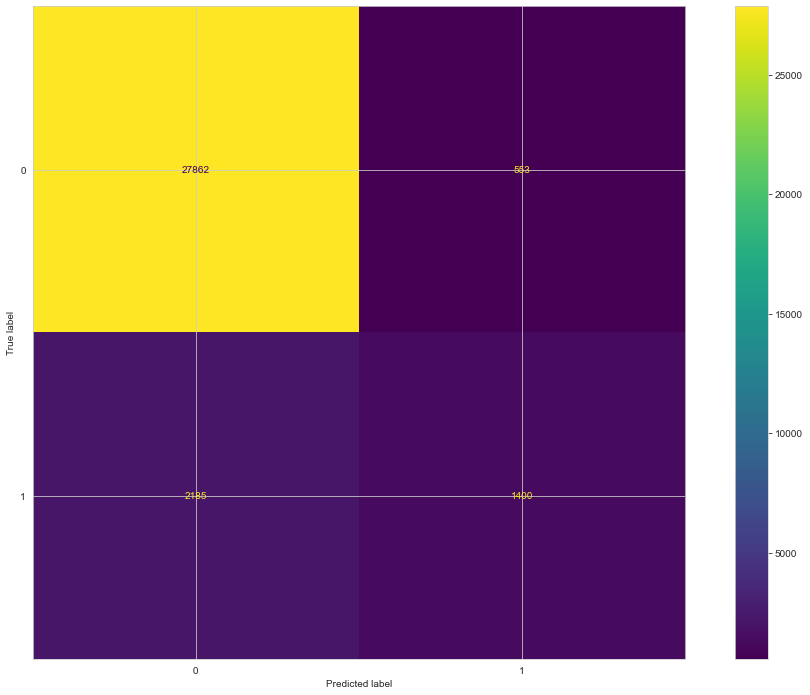

In [ ]:
disp_cmatrix = ConfusionMatrixDisplay(confusion_matrix = cmatrix ,display_labels=model_XGB.classes_)
disp_cmatrix.plot()
#better from logistic classification in terms of  reduction of FN, neural network model might give better results

**ROC** **Curve**

**STEP 4: TEST DATASET PREDICTION**

Importing the test dataset file

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_Detection_Test.csv to Fraud_Detection_Test (1).csv


In [ ]:
test=pd.read_csv('Fraud_Detection_Test.csv')
#test as test dataframe

In [ ]:
test.shape

(10001, 200)

Scalarising the test data before predictions

In [ ]:
scaler=StandardScaler()
df_x_scaled_test=scaler.fit_transform(test)
print(df_x_scaled_test)

[[-0.07564272 -0.31500232 -0.64784097 ...  0.03102981  0.46847627
   0.21225868]
 [ 0.5942472  -0.86799846  0.62404671 ...  0.06978903 -0.40400989
  -0.81728816]
 [ 1.25040288  0.3692829   1.30783364 ... -1.23047612 -0.84749818
   0.17079274]
 ...
 [-1.06320822 -0.97539365  1.11134121 ...  0.1595914  -0.14022314
  -0.10541963]
 [-0.67434212  0.66435601  2.03830536 ... -0.8939016  -0.21359361
   0.6727812 ]
 [-1.07312288 -1.51802486  0.70729369 ...  2.66098557  1.22677389
  -2.27294914]]


Predicting using logistic model

In [ ]:
y_pred_prob = model_XGB.predict_proba(df_x_scaled_test)[:, 1]
threshold = 0.37
y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]
#applying the previous threshold of 0.37 as used in training data set

In [ ]:
Test_prediction=y_pred

(array([9418.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         583.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

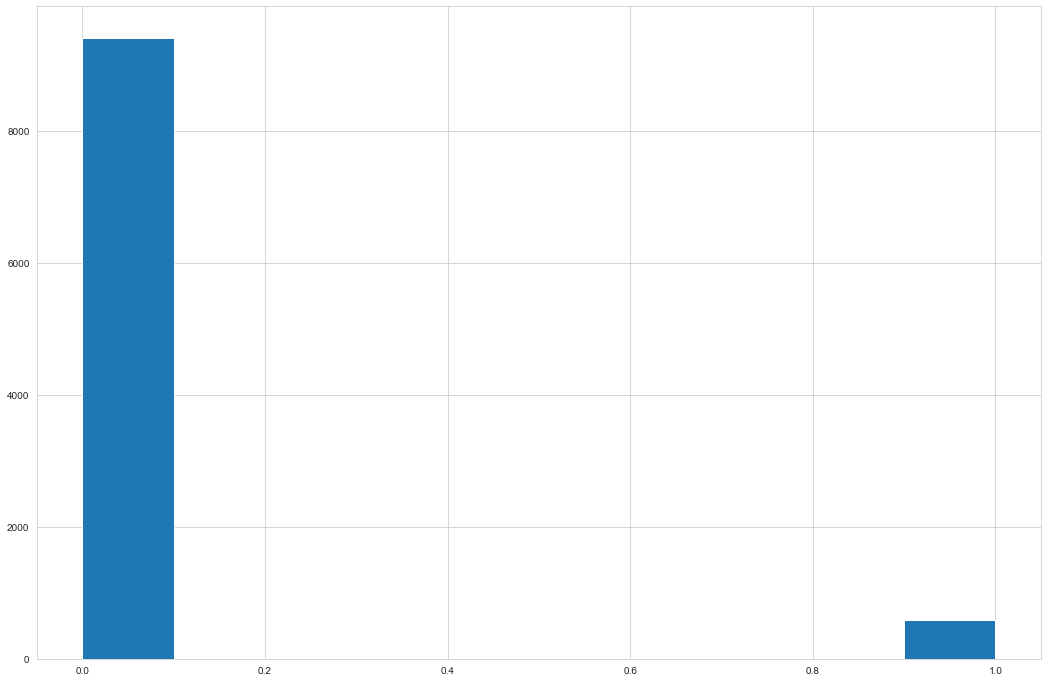

In [ ]:
plt.hist(Test_prediction)
#more 0s than 1s again, as expected

Exporting into Test prediction csv file

In [ ]:
prediction=pd.DataFrame(Test_prediction).to_csv('EA2_test_predictionsdeliverable2.csv', index=False )